<a href="https://colab.research.google.com/github/Gui-Rigaud/hateful-speech-detection/blob/feat%2Feda%2Bfeature_extraction/Detec%C3%A7%C3%A3o_de_Fake_News_Projeto_CIN0144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Bibliotecas

In [ ]:
%pip install transformers
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

## Análise Exploratória dos Dados

In [5]:
from sklearn.model_selection import train_test_split

train_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/train.csv'
df_train = pd.read_csv(train_file_path)
y_train = df_train['label']
X_train = df_train['content']

test_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/test.csv'
df_test = pd.read_csv(test_file_path)
y_test = df_test['label']
X_test = df_test['content']

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  5760 non-null   object 
 1   label    5760 non-null   int64  
 2   rating   5760 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.1+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   content          1440 non-null   object 
 1   label            1440 non-null   int64  
 2   rating           1440 non-null   float64
 3   predicted_label  1440 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 45.1+ KB


In [8]:
df_train.head()

,content,label,rating
0,﻿juiz determina soltura de 4 presos por pensão...,1,0.031619
1,"pivô do mensalão, jefferson não assistiu à tra...",1,0.033124
2,oficial da reserva avisa: se a lei do impeachm...,0,0.008723
3,bolsonaro vai para o psl e liberais abandonam ...,1,0.016806
4,"por maioria de votos, os ministros da 2.a tur...",1,0.021402


In [9]:
df_test.head()

,content,label,rating,predicted_label
0,começou a baderna! apoiadores de lula são pego...,0,0.000000,0
1,eike deixou o país com passaporte alemão e pod...,0,0.000000,0
2,delcídio dá entrevista e confirma quem são os ...,0,0.000000,0
3,urgente: mtst invade prédio oficial da presidê...,0,0.030483,0
4,"em 2009, barbosa alertou: gilmar mendes está d...",0,0.000000,0


In [10]:
print("Tamanho do conjunto de TREINO:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

print("Tamanho do conjunto de TESTE:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

Tamanho do conjunto de TREINO:
Textos: 5760
Rótulos: 5760
Tamanho do conjunto de TESTE:
Textos: 5760
Rótulos: 5760


In [11]:
# Identificando valores nulos

# Conjunto de treino
print("\nValores Nulos:")
print("\nTreino")
print(df_train.isnull().sum())

# Conjunto de teste
print("\nTeste")
print(df_train.isnull().sum())


Valores Nulos:

Treino
content    0
label      0
rating     0
dtype: int64

Teste
content    0
label      0
rating     0
dtype: int64


In [12]:
# Contagem de textos duplicados no conjunto de treino
duplicates_train = df_train.duplicated(subset=['content']).sum()
print(f"Número de textos duplicados no conjunto de treino: {duplicates_train}")

# Contagem de textos duplicados no conjunto de teste
duplicates_test = df_test.duplicated(subset=['content']).sum()
print(f"Número de textos duplicados no conjunto de teste: {duplicates_test}")


Número de textos duplicados no conjunto de treino: 1
Número de textos duplicados no conjunto de teste: 0


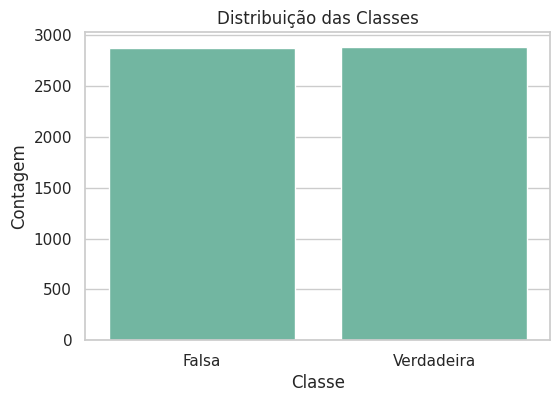

In [13]:
class_distribution = df_train['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

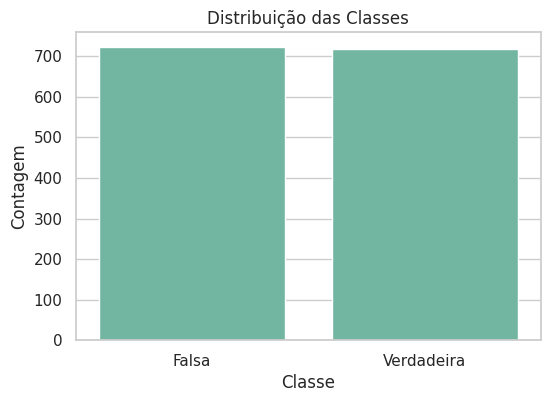

In [14]:
class_distribution = df_test['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

In [15]:
df_train['text_length'] = df_train['content'].apply(len)
df_test['text_length'] = df_test['content'].apply(len)

print("Added 'text_length' column to df_train. Head of df_train:")
print(df_train.head())
print("\nAdded 'text_length' column to df_test. Head of df_test:")
print(df_test.head())

Added 'text_length' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  
0         4535  
1         4062  
2         1338  
3         5669  
4         3219  

Added 'text_length' column to df_test. Head of df_test:
                                             content  label    rating  \
0  começou a baderna! apoiadores de lula são pego...      0  0.000000   
1  eike deixou o país com passaporte alemão e pod...      0  0.000000   
2  delcídio dá entrevista e confirma quem são os ...      0  0.000000   
3  urgente: mtst invade prédio oficial da presidê...

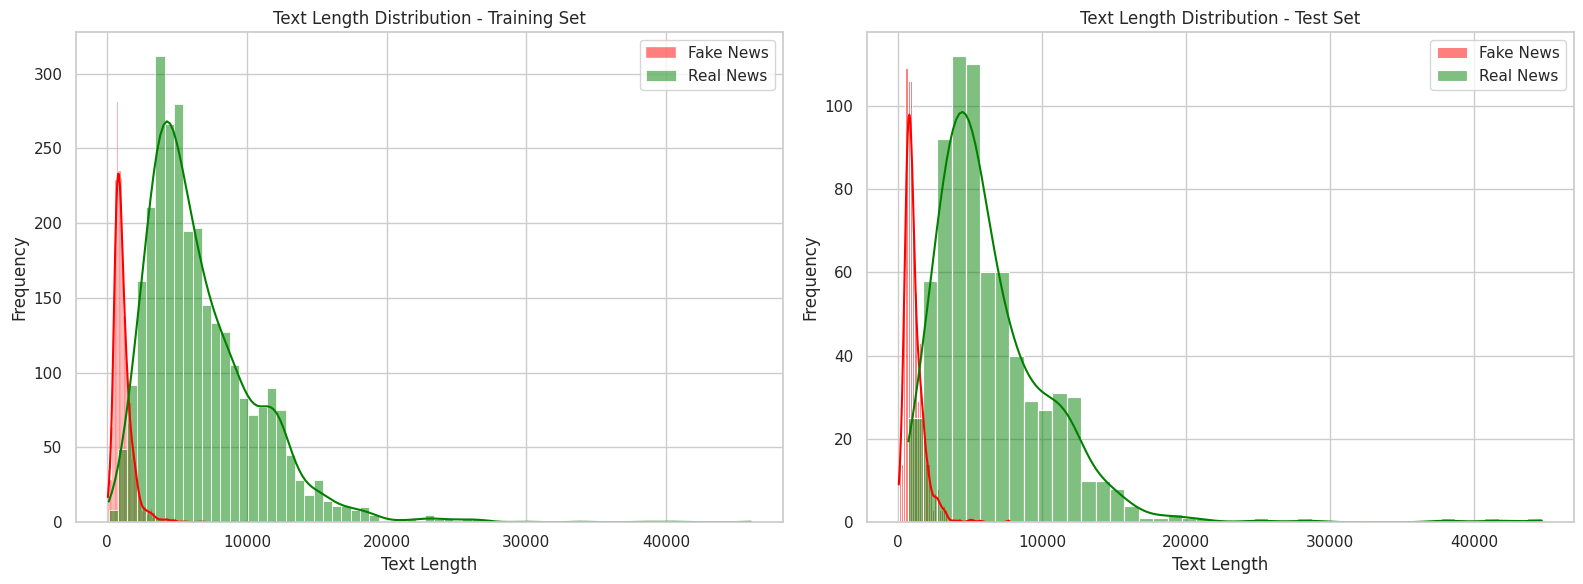

Text length distribution plots generated for training and test sets.


In [16]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

df_test_fake = df_test[df_test['label'] == 0]
df_test_real = df_test[df_test['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['text_length'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['text_length'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Text Length Distribution - Training Set')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(df_test_fake['text_length'], color="red", label="Fake News", kde=True, ax=axes[1])
sns.histplot(df_test_real['text_length'], color="green", label="Real News", kde=True, ax=axes[1])
axes[1].set_title('Text Length Distribution - Test Set')
axes[1].set_xlabel('Text Length')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Text length distribution plots generated for training and test sets.")

In [17]:
df_train['word_count'] = df_train['content'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['content'].apply(lambda x: len(x.split()))

print("Added 'word_count' column to df_train. Head of df_train:")
print(df_train.head())
print("\nAdded 'word_count' column to df_test. Head of df_test:")
print(df_test.head())

Added 'word_count' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  word_count  
0         4535         727  
1         4062         668  
2         1338         224  
3         5669         917  
4         3219         500  

Added 'word_count' column to df_test. Head of df_test:
                                             content  label    rating  \
0  começou a baderna! apoiadores de lula são pego...      0  0.000000   
1  eike deixou o país com passaporte alemão e pod...      0  0.000000   
2  delcídio dá entrevista e confirma quem são os ...   

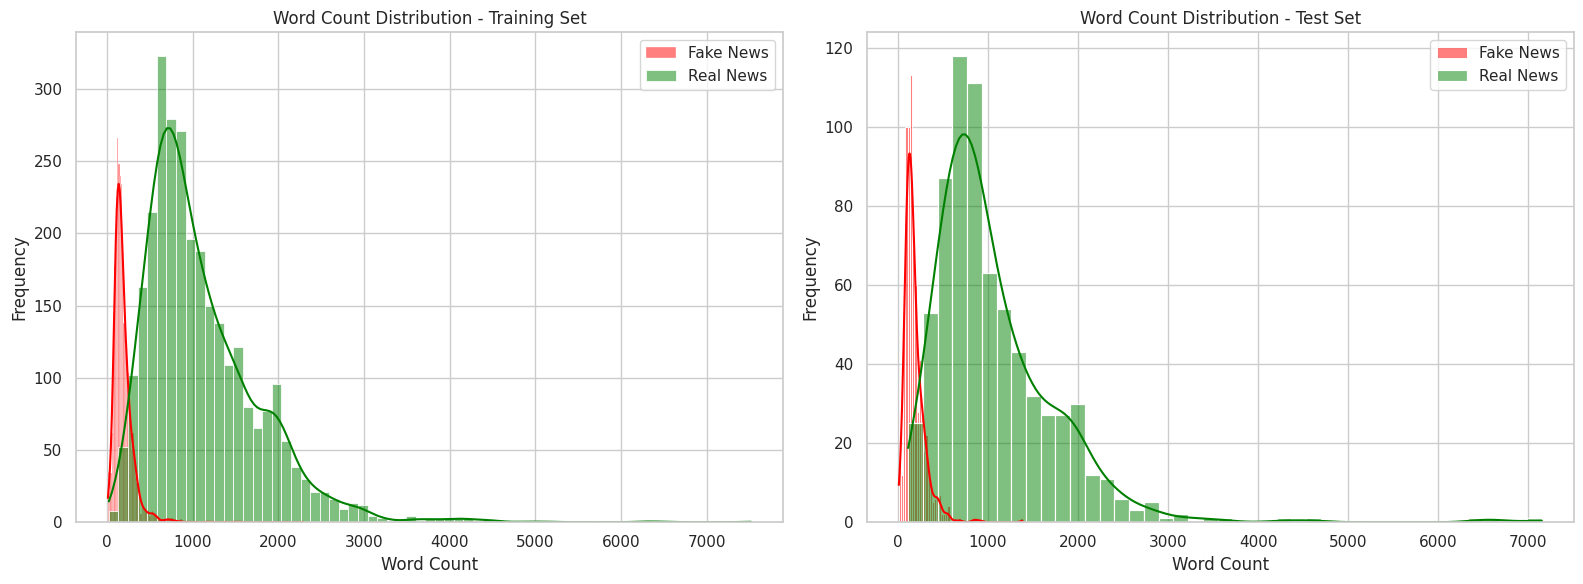

Word count distribution plots generated for training and test sets.


In [18]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

df_test_fake = df_test[df_test['label'] == 0]
df_test_real = df_test[df_test['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['word_count'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['word_count'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Word Count Distribution - Training Set')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(df_test_fake['word_count'], color="red", label="Fake News", kde=True, ax=axes[1])
sns.histplot(df_test_real['word_count'], color="green", label="Real News", kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution - Test Set')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Word count distribution plots generated for training and test sets.")

## Separação dos conjuntos em treino, teste e validação

In [19]:
X_train, X_val, y_train, y_val = train_test_split(df_train["content"], df_train["label"], test_size=0.2, random_state=42)

In [20]:
# Exibindo o tamanho dos novos conjuntos
print("Conjunto de Treino:")
print("X_train size:", X_train.shape)
print("Y_train size:", y_train.shape)

print("\nConjunto de Validação:")
print("X_val size:", X_val.shape)
print("Y_val size:", y_val.shape)

print("\nConjunto de Teste:")
print("X_test size:", X_test.shape)
print("Y_test size:", y_test.shape)

Conjunto de Treino:
X_train size: (4608,)
Y_train size: (4608,)

Conjunto de Validação:
X_val size: (1152,)
Y_val size: (1152,)

Conjunto de Teste:
X_test size: (1440,)
Y_test size: (1440,)


## Limpeza dos dados

In [21]:
# Remover valores repetidos do conjunto de treino
df_train.drop_duplicates(subset=['content'], inplace=True)

print(f"Novo tamanho do conjunto de treino após remover duplicatas: {len(df_train)}")


Novo tamanho do conjunto de treino após remover duplicatas: 5759


In [22]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('portuguese')
except LookupError:
    nltk.download('stopwords')
    print("NLTK 'stopwords' corpus downloaded.")
else:
    print("NLTK 'stopwords' corpus is already downloaded.")

NLTK 'stopwords' corpus downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^À-ſ -~]', '', text) # Keep only accented characters, common punctuation, numbers and letters from the Latin-1 Supplement Unicode block
    text = re.sub(r'\W', ' ', text) # Remove punctuation and symbols, keep spaces
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing whitespace

    # Handle specific patterns if needed, for example, multiple dots or other common noise
    text = re.sub(r'\.{2,}', '.', text) # Replace multiple dots with a single dot

    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = text.split()
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

# Apply the cleaning function
X_train = X_train.apply(clean_text)
X_val = X_val.apply(clean_text)
X_test = X_test.apply(clean_text)

# Create new DataFrames with cleaned content and labels
df_train_cleaned = pd.DataFrame({'cleaned_content': X_train, 'label': y_train})
df_val_cleaned = pd.DataFrame({'cleaned_content': X_val, 'label': y_val})
df_test_cleaned = pd.DataFrame({'cleaned_content': X_test, 'label': y_test})

# Separate cleaned content by label for train, validation, and test sets
X_train_fake_cleaned = df_train_cleaned[df_train_cleaned['label'] == 0]['cleaned_content']
X_train_real_cleaned = df_train_cleaned[df_train_cleaned['label'] == 1]['cleaned_content']

X_val_fake_cleaned = df_val_cleaned[df_val_cleaned['label'] == 0]['cleaned_content']
X_val_real_cleaned = df_val_cleaned[df_val_cleaned['label'] == 1]['cleaned_content']

X_test_fake_cleaned = df_test_cleaned[df_test_cleaned['label'] == 0]['cleaned_content']
X_test_real_cleaned = df_test_cleaned[df_test_cleaned['label'] == 1]['cleaned_content']

print("Text cleaning and separation by label completed for all datasets.")
print("Head of X_train:")
print(X_train.head())
print("\nHead of X_train_fake_cleaned:")
print(X_train_fake_cleaned.head())

Text cleaning and separation by label completed for all datasets.
Head of X_train:
387     veja leia íntegra pronunciamento temer sobre d...
4362    travessia infância adolescência internado inst...
4397    força tarefa operação lava jato cruzou documen...
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
Name: content, dtype: object

Head of X_train_fake_cleaned:
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
3166    ministro coreia nova york declarou guerra eua ...
2146    gráficas movimentaram r 52 milhões campanha di...
3103    lula admite condenado novos crimes pf mp inven...
Name: cleaned_content, dtype: object


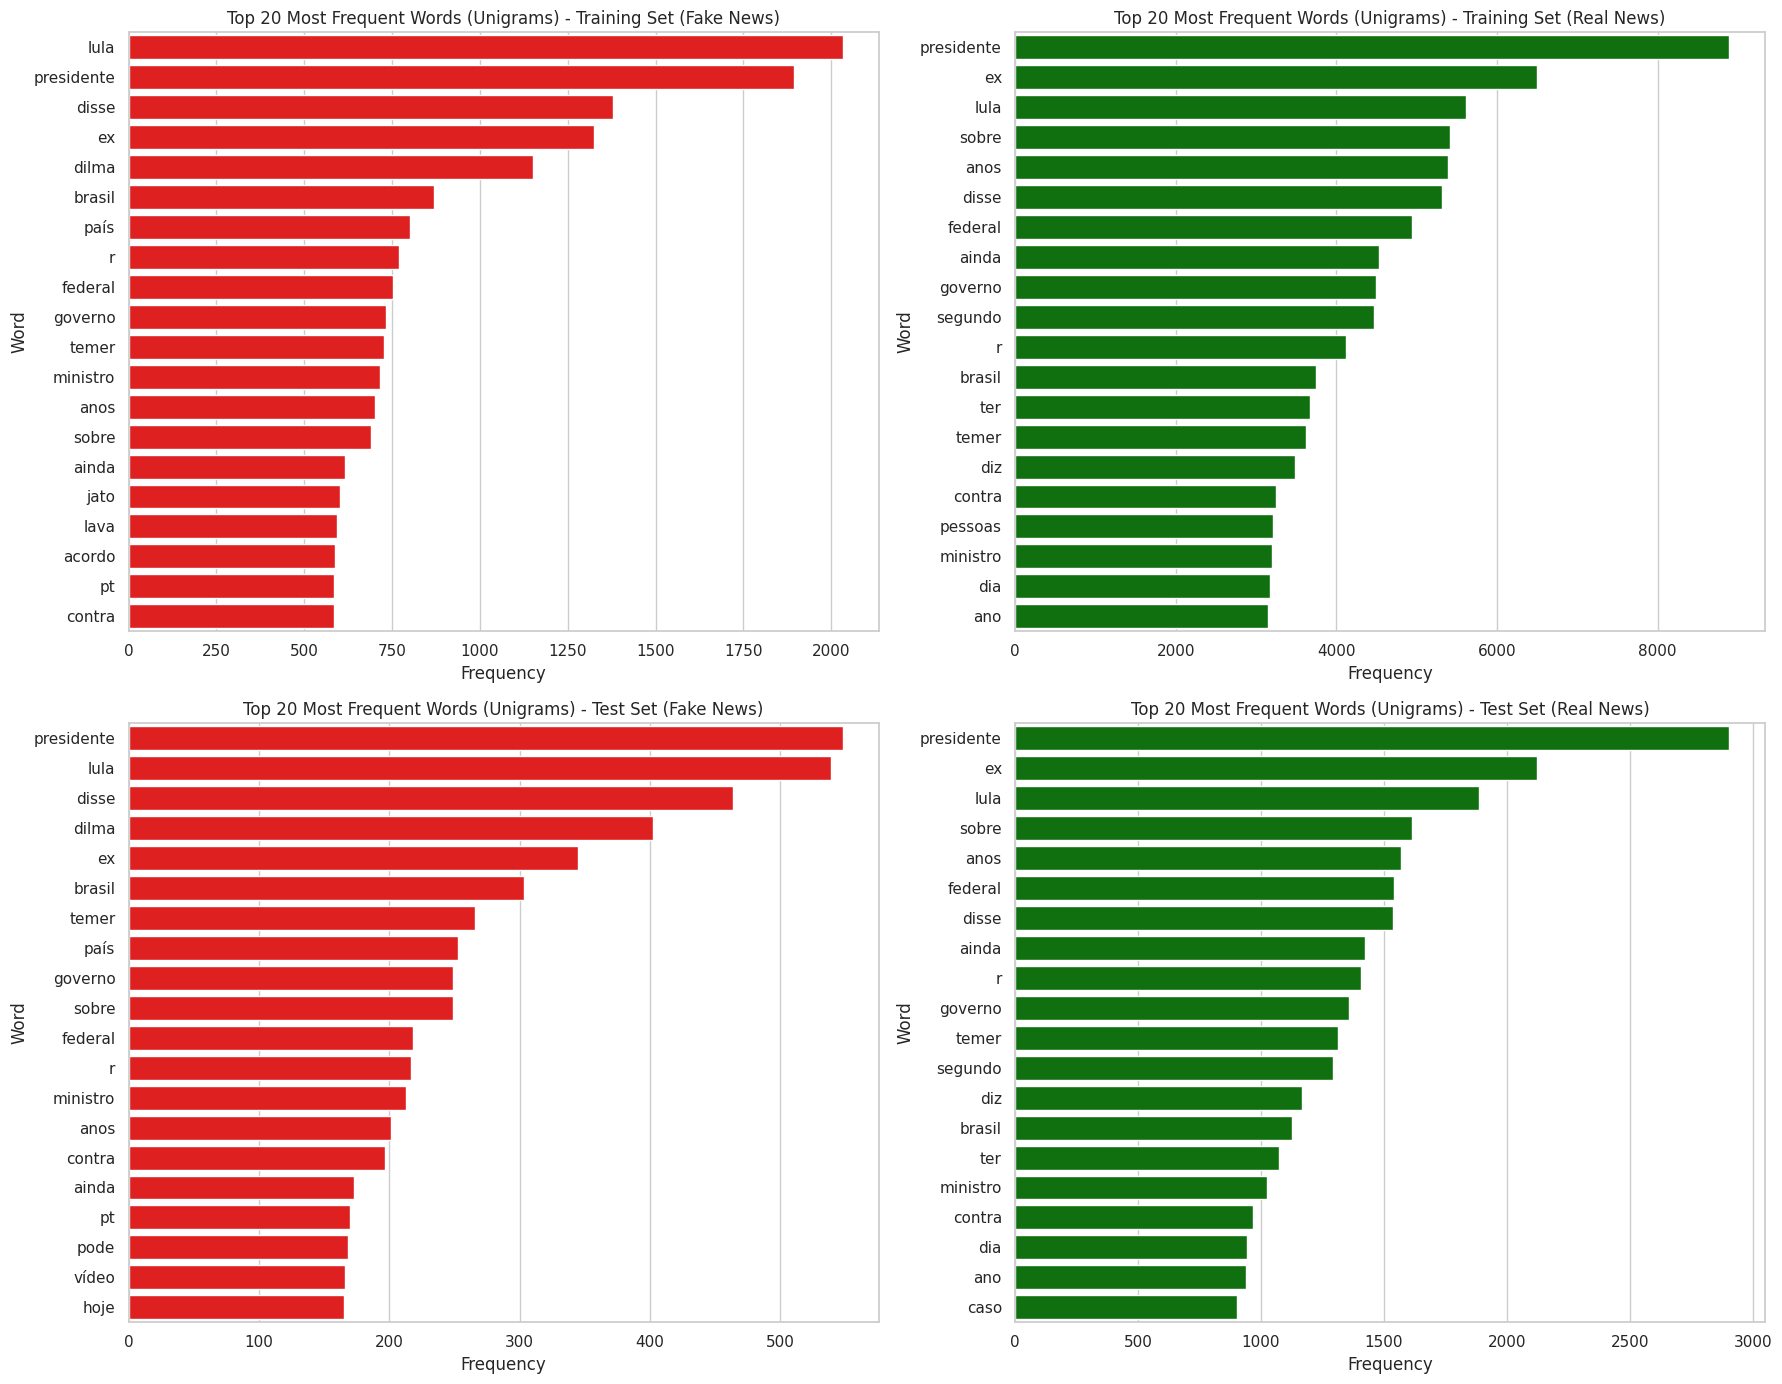

Top 20 most frequent unigrams for fake and real news in training and test sets are displayed.


In [24]:
from collections import Counter

def get_top_n_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top 20 most common words for each category and dataset
top_fake_train_words = get_top_n_words(X_train_fake_cleaned)
top_real_train_words = get_top_n_words(X_train_real_cleaned)
top_fake_test_words = get_top_n_words(X_test_fake_cleaned)
top_real_test_words = get_top_n_words(X_test_real_cleaned)

# Prepare data for plotting
def prepare_plot_data(top_words):
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]
    return pd.DataFrame({'Word': words, 'Count': counts})

df_top_fake_train = prepare_plot_data(top_fake_train_words)
df_top_real_train = prepare_plot_data(top_real_train_words)
df_top_fake_test = prepare_plot_data(top_fake_test_words)
df_top_real_test = prepare_plot_data(top_real_test_words)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Training Set - Fake News
sns.barplot(x='Count', y='Word', data=df_top_fake_train, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Fake News)')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Word')

# Training Set - Real News
sns.barplot(x='Count', y='Word', data=df_top_real_train, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Real News)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Word')

# Test Set - Fake News
sns.barplot(x='Count', y='Word', data=df_top_fake_test, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Top 20 Most Frequent Words (Unigrams) - Test Set (Fake News)')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Word')

# Test Set - Real News
sns.barplot(x='Count', y='Word', data=df_top_real_test, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Top 20 Most Frequent Words (Unigrams) - Test Set (Real News)')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Word')

plt.tight_layout()
plt.show()

print("Top 20 most frequent unigrams for fake and real news in training and test sets are displayed.")

In [25]:
from wordcloud import WordCloud
import matplotlib.colors

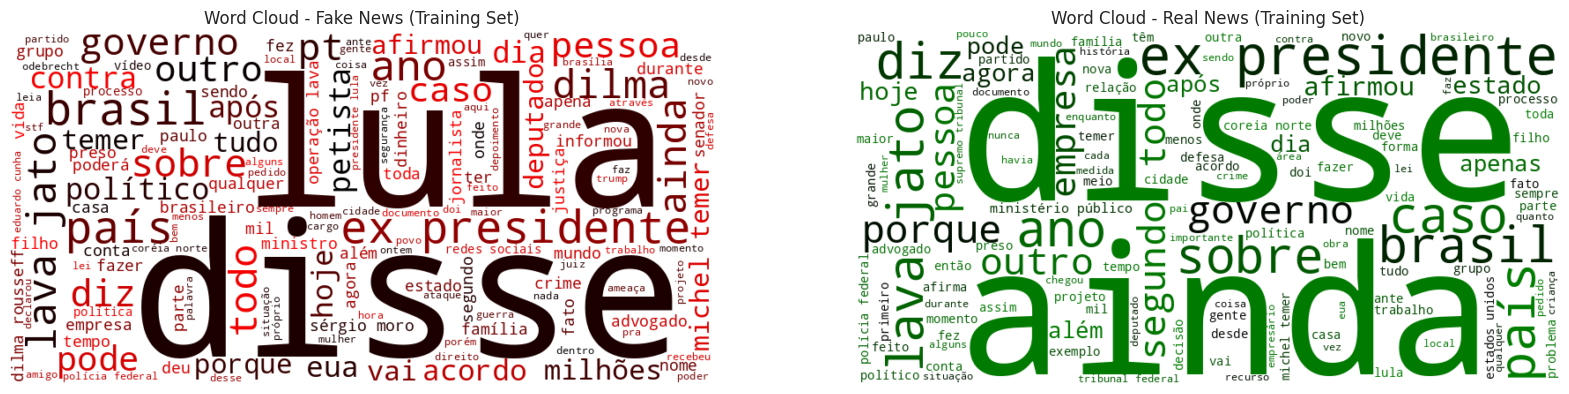

Word clouds for fake and real news in the training set have been generated and displayed.


In [26]:
cmap_fake = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_fake", ["#000000", "#8b0000", "#ff0000"]) # Black to dark red to red
cmap_real = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_real", ["#000000", "#006400", "#008000"]) # Black to dark green to green

# Create a single string of all cleaned fake news words for the training set
all_fake_train_words = ' '.join(X_train_fake_cleaned.astype(str))

# Create a single string of all cleaned real news words for the training set
all_real_train_words = ' '.join(X_train_real_cleaned.astype(str))

# Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap=cmap_fake, min_font_size=10).generate(all_fake_train_words)

# Generate word cloud for real news
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap=cmap_real, min_font_size=10).generate(all_real_train_words)

# Display both word clouds side-by-side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News (Training Set)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real News (Training Set)')
plt.axis('off')

plt.show()

print("Word clouds for fake and real news in the training set have been generated and displayed.")

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigrams(text_series, n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_counts_matrix = vectorizer.fit_transform(text_series)
    bigram_names = vectorizer.get_feature_names_out()
    sum_bigram_counts = bigram_counts_matrix.sum(axis=0)
    bigram_counts = [(bigram_names[i], sum_bigram_counts[0, i]) for i in range(len(bigram_names))]
    bigram_counts = sorted(bigram_counts, key=lambda x: x[1], reverse=True)
    return bigram_counts[:n]

# Get top 20 most common bigrams for each category and dataset
top_fake_train_bigrams = get_top_n_bigrams(X_train_fake_cleaned)
top_real_train_bigrams = get_top_n_bigrams(X_train_real_cleaned)
top_fake_test_bigrams = get_top_n_bigrams(X_test_fake_cleaned)
top_real_test_bigrams = get_top_n_bigrams(X_test_real_cleaned)

# Prepare data for plotting
def prepare_plot_data_bigrams(top_bigrams):
    bigrams = [bigram for bigram, count in top_bigrams]
    counts = [count for bigram, count in top_bigrams]
    return pd.DataFrame({'Bigram': bigrams, 'Count': counts})

df_top_fake_train_bigrams = prepare_plot_data_bigrams(top_fake_train_bigrams)
df_top_real_train_bigrams = prepare_plot_data_bigrams(top_real_train_bigrams)
df_top_fake_test_bigrams = prepare_plot_data_bigrams(top_fake_test_bigrams)
df_top_real_test_bigrams = prepare_plot_data_bigrams(top_real_test_bigrams)

print("Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.")


Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.


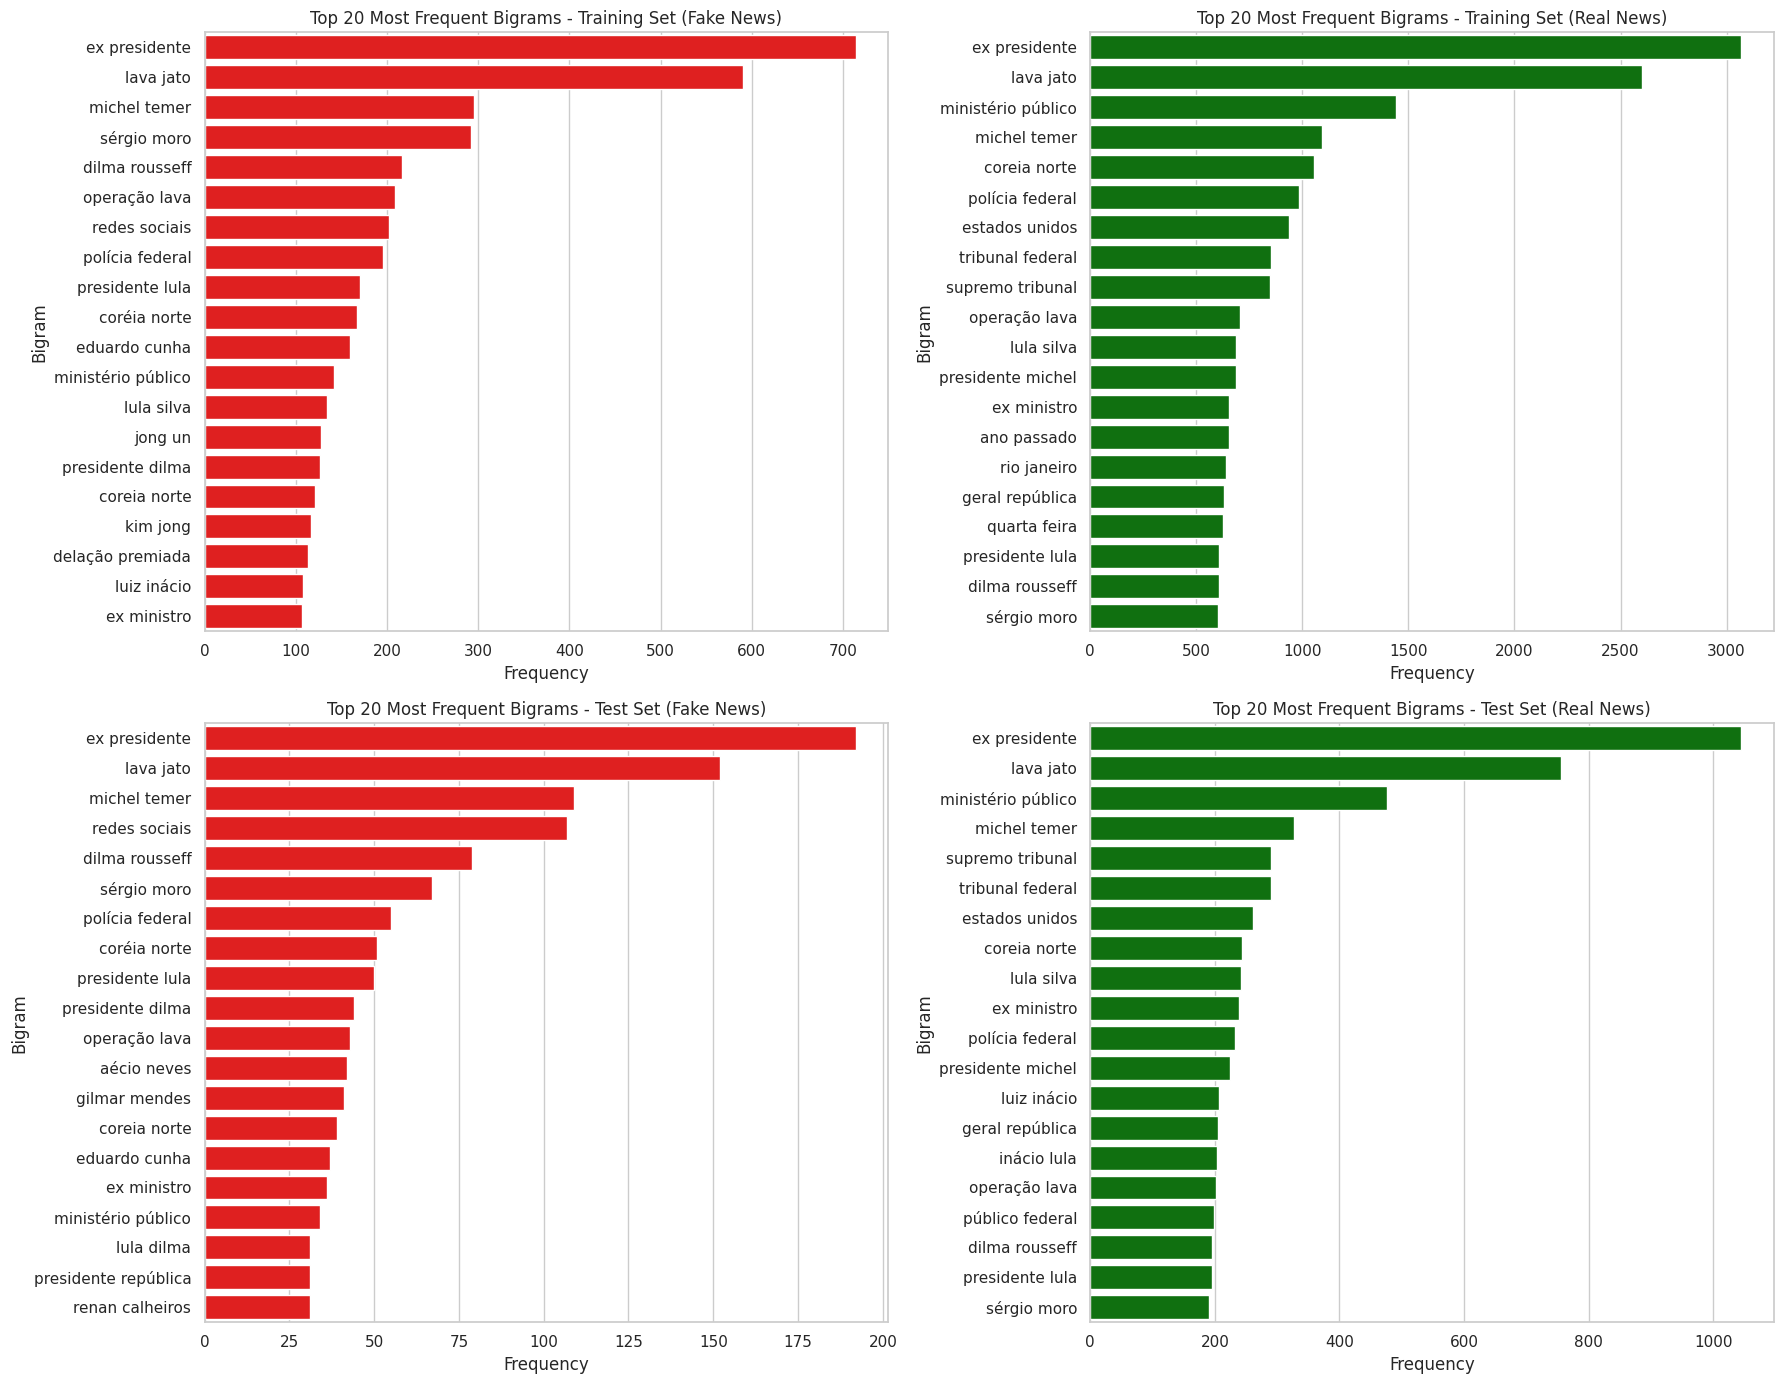

Top 20 most frequent bigrams for fake and real news in training and test sets are displayed.


In [28]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Training Set - Fake News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_fake_train_bigrams, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Top 20 Most Frequent Bigrams - Training Set (Fake News)')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Bigram')

# Training Set - Real News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_real_train_bigrams, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Top 20 Most Frequent Bigrams - Training Set (Real News)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Bigram')

# Test Set - Fake News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_fake_test_bigrams, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Top 20 Most Frequent Bigrams - Test Set (Fake News)')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Bigram')

# Test Set - Real News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_real_test_bigrams, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Top 20 Most Frequent Bigrams - Test Set (Real News)')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Bigram')

plt.tight_layout()
plt.show()

print("Top 20 most frequent bigrams for fake and real news in training and test sets are displayed.")

## Extração de Características

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_val_vector = vectorizer.transform(X_val)

In [30]:
print(X_train_vector.shape)
print(X_test_vector.shape)
print(X_val_vector.shape)

(4608, 71956)
(1440, 71956)
(1152, 71956)


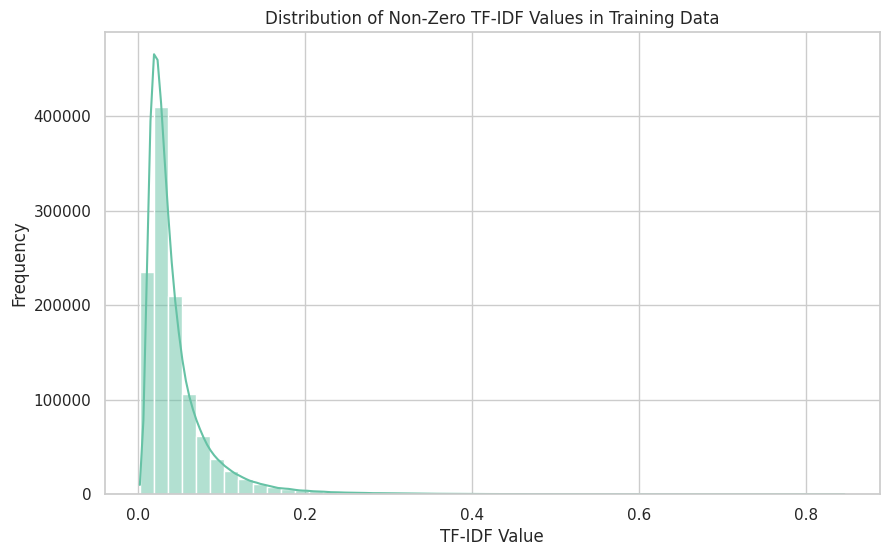

Minimum TF-IDF value: 0.0022
Maximum TF-IDF value: 0.8455
Mean TF-IDF value: 0.0455
Standard Deviation of TF-IDF values: 0.0442


In [31]:
# Get non-zero values from the sparse matrix
# TF-IDF vectors are typically sparse, so visualizing all zeros is not informative.
non_zero_values = X_train_vector.data

plt.figure(figsize=(10, 6))
sns.histplot(non_zero_values, bins=50, kde=True)
plt.title('Distribution of Non-Zero TF-IDF Values in Training Data')
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum TF-IDF value: {np.min(non_zero_values):.4f}")
print(f"Maximum TF-IDF value: {np.max(non_zero_values):.4f}")
print(f"Mean TF-IDF value: {np.mean(non_zero_values):.4f}")
print(f"Standard Deviation of TF-IDF values: {np.std(non_zero_values):.4f}")


## Tokenização

In [32]:
from transformers import BertTokenizer, BertModel
import torch
from google.colab import userdata
from tqdm.auto import tqdm

# Get HuggingFace token from Colab secrets
hf_token = userdata.get('HF_TOKEN')

# Initialize tokenizer and model with the token
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', token=hf_token)
model = BertModel.from_pretrained('bert-base-uncased', token=hf_token)

def get_bert_embeddings(text):
    # Gera as inputs como tensores PyTorch com truncamento e comprimento máximo de 512 tokens
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Passa os tensores para o modelo
    outputs = model(**inputs)
    # Calcula a média sobre a dimensão das sequências e converte para NumPy
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

print("Generating BERT embeddings. This might take a while...")
# Obtenha os embeddings para o conjunto de treino, teste e validação
X_train_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_train, desc="Generating train embeddings")]
X_test_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_test, desc="Generating test embeddings")]
X_val_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_val, desc="Generating validation embeddings")]
print("BERT embeddings generation complete.")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating BERT embeddings. This might take a while...


Generating train embeddings:   0%|          | 0/4608 [00:00<?, ?it/s]

Generating test embeddings:   0%|          | 0/1440 [00:00<?, ?it/s]

Generating validation embeddings:   0%|          | 0/1152 [00:00<?, ?it/s]

BERT embeddings generation complete.


In [33]:
import numpy as np
X_train_bert_embeddings_save = np.array(X_train_bert_embeddings)
X_test_bert_embeddings_save = np.array(X_test_bert_embeddings)
X_val_bert_embeddings_save = np.array(X_val_bert_embeddings)

# Salvando os embeddings
np.save('X_train_bert_embeddings.npy', X_train_bert_embeddings_save)
np.save('X_test_bert_embeddings.npy', X_test_bert_embeddings_save)
np.save('X_val_bert_embeddings.npy', X_val_bert_embeddings_save)
print("Embeddings salvos!")

Embeddings salvos!


In [34]:
# Carregando os embeddings salvos
X_train_bert_embeddings = np.load('/content/X_train_bert_embeddings.npy')
X_test_bert_embeddings = np.load('/content/X_test_bert_embeddings.npy')
X_val_bert_embeddings = np.load('/content/X_val_bert_embeddings.npy')


print("Tamanho dos embeddings de treino:", X_train_bert_embeddings.shape)
print("Tamanho dos embeddings de teste:", X_test_bert_embeddings.shape)
print("Tamanho dos embeddings de validação:", X_val_bert_embeddings.shape)

Tamanho dos embeddings de treino: (4608, 1, 768)
Tamanho dos embeddings de teste: (1440, 1, 768)
Tamanho dos embeddings de validação: (1152, 1, 768)


## Modelagem de Dados
Nesta seção treinamos modelos de referência (baselines) usando TF-IDF e comparamos com classificadores treinados sobre embeddings BERT, caso estes estejam disponíveis no ambiente do Colab.

In [ ]:
# Preparação: imports e verificação dos conjuntos limpos
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
sns.set_theme(style="whitegrid")
# Garantir que os DataFrames limpos existam (fallback se necessário)
try:
    df_train_cleaned
    df_val_cleaned
    df_test_cleaned
except NameError:
    print("Conjuntos limpos não encontrados nas variáveis atuais — recriando a partir dos dados originais.")
    df_train['cleaned_content'] = df_train['content'].apply(clean_text)
    df_test['cleaned_content'] = df_test['content'].apply(clean_text)
    from sklearn.model_selection import train_test_split
    X_all = df_train['cleaned_content']
    y_all = df_train['label']
    X_train_tmp, X_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)
    df_train_cleaned = pd.DataFrame({'cleaned_content': X_train_tmp, 'label': y_train_tmp})
    df_val_cleaned = pd.DataFrame({'cleaned_content': X_val_tmp, 'label': y_val_tmp})
    df_test_cleaned = pd.DataFrame({'cleaned_content': df_test['cleaned_content'], 'label': df_test['label']})
# Definir X e y
X_train_text = df_train_cleaned['cleaned_content'].astype(str)
y_train = df_train_cleaned['label']
X_val_text = df_val_cleaned['cleaned_content'].astype(str)
y_val = df_val_cleaned['label']
X_test_text = df_test_cleaned['cleaned_content'].astype(str)
y_test = df_test_cleaned['label']
print("Tamanhos dos conjuntos -> train:, val:, test:", X_train_text.shape, X_val_text.shape, X_test_text.shape)

In [ ]:
# Pipeline 1: TF-IDF (unigram+bigram) + Baselines (LogisticRegression, LinearSVC)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
X_train_vec = vectorizer.fit_transform(X_train_text)
X_val_vec = vectorizer.transform(X_val_text)
X_test_vec = vectorizer.transform(X_test_text)
print('TF-IDF shapes:', X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

# Definir e treinar modelos
logreg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
svc = LinearSVC(max_iter=2000)

print('Treinando LogisticRegression...')
logreg.fit(X_train_vec, y_train)

print('Treinando LinearSVC...')
svc.fit(X_train_vec, y_train)

# Avaliar e mostrar relatórios
models = {'LogReg_TFIDF': logreg, 'LinearSVC_TFIDF': svc}
for name, model in models.items():
    print(f"\n===== Resultados para {name} =====\n")
    y_val_pred = model.predict(X_val_vec)
    y_test_pred = model.predict(X_test_vec)

    print("-- Validação --")
    print(classification_report(y_val, y_val_pred, digits=4))

    print("\n-- Teste --")
    print(classification_report(y_test, y_test_pred, digits=4))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # salvar modelo localmente para download no Colab se desejado
    joblib.dump(model, f'{name}.joblib')

# salvar o vetorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

In [ ]:
# Pipeline 2 (opcional): usar embeddings BERT já gerados e salvos no notebook
import os
bert_candidates = ['X_train_bert_embeddings.npy', '/content/X_train_bert_embeddings.npy']
path = None
for p in bert_candidates:
    if os.path.exists(p):
        path = os.path.dirname(p) or '.'
        break
if path is None:
    print('Nenhum arquivo local de embeddings BERT encontrado. Pule esta etapa se não estiver usando embeddings.')
else:
    # carregar e adaptar formatos variados
    def try_load(name):
        candidates = [os.path.join(path, name), name, os.path.join('/content', name)]
        for c in candidates:
            if os.path.exists(c):
                return np.load(c, allow_pickle=True)
        raise FileNotFoundError(name)
    X_train_bert = try_load('X_train_bert_embeddings.npy')
    X_test_bert = try_load('X_test_bert_embeddings.npy')
    X_val_bert = try_load('X_val_bert_embeddings.npy')
    # Normalizar/flatten embeddings para formato (n_samples, dim)
    def flatten_embeddings(arr):
        arr = np.array(arr, dtype=object)
        try:
            stacked = np.vstack([np.array(x).reshape(-1) if np.array(x).ndim>1 else np.array(x) for x in arr])
            return stacked
        except Exception:
            return np.vstack(np.squeeze(arr))
    X_train_emb = flatten_embeddings(X_train_bert)
    X_test_emb = flatten_embeddings(X_test_bert)
    X_val_emb = flatten_embeddings(X_val_bert)
    print('Embeddings shapes (train/val/test):', X_train_emb.shape, X_val_emb.shape, X_test_emb.shape)
    # Treinar classificador simples sobre embeddings
    clf_emb = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
    clf_emb.fit(X_train_emb, y_train)
    y_test_pred_emb = clf_emb.predict(X_test_emb)
    # Corrigido: evitar string literal não terminado, imprimir relatório em chamadas separadas
    print("Relatório (BERT embeddings -> LogisticRegression):")
    print(classification_report(y_test, y_test_pred_emb, digits=4))
    cm = confusion_matrix(y_test, y_test_pred_emb)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - BERT embeddings (test)')
    plt.show()
    joblib.dump(clf_emb, 'logreg_bert_embeddings.joblib')

**Observações finais**:
- As células acima criam dois pipelines reproduzíveis: (1) TF-IDF + baselines; (2) (opcional) treino sobre embeddings BERT salvos localmentoeo.

## Finalização da Modelagem: mais modelos, tunagem e comparação de reamostragem
As células a seguir adicionam: MultinomialNB e RandomForest, GridSearchCV para tunagem, experimentos com oversampling/undersampling (RandomOverSampler / RandomUnderSampler) e salvamento de métricas e artefatos em `models/` e `reports/`.

In [ ]:
# Instala/atualiza apenas o que é necessário para evitar conflitos com outros pacotes
# Evitamos forçar uma versão do scikit-learn (isso pode quebrar outras dependências no Colab).
# Estratégia: tentar importar; se falhar, instalar/atualizar imbalanced-learn e shap.

try:
    import imblearn
    import shap
    print('imblearn and shap already available. imblearn==', getattr(imblearn, '__version__', 'unknown'), 'shap==', getattr(shap, '__version__', 'unknown'))
except Exception as e:
    print('imblearn/shap not available or import failed (', e, '). Installing/upgrading packages now...')
    import sys
    # Atualiza apenas imbalanced-learn e shap; NÃO forçamos scikit-learn para evitar conflitos
    # Use quiet para reduzir saída; se quiser ver detalhes, remova --quiet
    !{sys.executable} -m pip install -U imbalanced-learn shap --quiet
    # Após instalar, sugerimos reiniciar o runtime (Colab) para garantir carregamento limpo das libs
    print('Instalação concluída. IMPORTANTE: reinicie o runtime (Runtime -> Restart runtime) antes de continuar.')

# Imports adicionais para a finalização da modelagem (serão executados depois do restart, se necessário)
import os
import time
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# Note: imblearn imports may be safe after restart; we import them later where used to avoid early ImportError
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import joblib
import warnings
warnings.filterwarnings('ignore')
# Criar pastas para artefatos
os.makedirs('models', exist_ok=True)
os.makedirs('reports', exist_ok=True)
print('Pastas `models/` e `reports/` prontas.\nSe instalou pacotes acima, reinicie o runtime antes de executar as próximas células.')

In [ ]:
# Definir novos modelos e grades de hiperparâmetros
models_to_run = {
    'MultinomialNB': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0]}),
    'RandomForest': (RandomForestClassifier(random_state=42, n_jobs=-1), {'n_estimators': [100, 200], 'max_depth': [None, 10, 30]})
}
# Reutilizar os modelos já treinados (LogReg, LinearSVC) se presentes na sessão
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
models_to_tune = {
    'LogisticRegression': (LogisticRegression(max_iter=2000, random_state=42), {'C': [0.01, 0.1, 1, 10]}),
    'LinearSVC': (LinearSVC(max_iter=2000), {'C': [0.01, 0.1, 1, 10]})
}
# Juntar dicionários
models_to_tune.update(models_to_run)
models_to_tune.keys()

In [ ]:
# Função utilitária para medir tempo de inferência por amostra
def measure_inference_time(model, X, n_runs=20):
    # repetir previsões e medir tempo médio por amostra em ms
    import time
    start = time.time()
    for _ in range(n_runs):
        _ = model.predict(X)
    end = time.time()
    total = (end - start) / n_runs
    return (total / X.shape[0]) * 1000  # ms por amostra

# Função para executar GridSearchCV e avaliar em validação e teste
def run_search_and_eval(name, estimator, param_grid, X_train_vec, y_train, X_val_vec, y_val, X_test_vec, y_test, sampler=None):
    print(f'Executando: {name} — sampler={sampler.__class__.__name__ if sampler else None}')
    # se houver sampler que altera X (RandomOverSampler/UnderSampler) e aceita matriz esparsa
    if sampler is None:
        X_train_used = X_train_vec
        y_train_used = y_train
    else:
        # Alguns samplers não aceitam sparse; usar TruncatedSVD para reduzir dimensionalidade
        # Em vez de testar isinstance(..., SMOTE) (que falha se SMOTE não estiver importado),
        # testamos pelo nome da classe do sampler para manter robustez no ambiente.
        if sampler is not None and sampler.__class__.__name__ == 'SMOTE':
            from sklearn.decomposition import TruncatedSVD
            svd = TruncatedSVD(n_components=100, random_state=42)
            X_train_reduced = svd.fit_transform(X_train_vec)
            X_res, y_res = sampler.fit_resample(X_train_reduced, y_train)
            X_train_used = X_res
            y_train_used = y_res
        else:
            # RandomOverSampler/UnderSampler e outros suportam matrices esparsas
            X_res, y_res = sampler.fit_resample(X_train_vec, y_train)
            X_train_used = X_res
            y_train_used = y_res
    # GridSearchCV
    from sklearn.model_selection import StratifiedKFold, GridSearchCV
    from sklearn.metrics import roc_auc_score
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    gs = GridSearchCV(estimator, param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=0)
    gs.fit(X_train_used, y_train_used)
    best = gs.best_estimator_
    print('Melhor params:', gs.best_params_)
    # Avaliar
    # Se treinamos com redução para SMOTE, precisamos transformar val/test com svd antes de predict
    def transform_for_predict(X_vec):
        # Usar a mesma detecção segura usada acima quando for necessário aplicar SVD
        if sampler is not None and sampler.__class__.__name__ == 'SMOTE':
            return svd.transform(X_vec)
        else:
            return X_vec
    X_val_for_pred = transform_for_predict(X_val_vec)
    X_test_for_pred = transform_for_predict(X_test_vec)
    y_val_pred = best.predict(X_val_for_pred)
    y_test_pred = best.predict(X_test_for_pred)
    # Probabilidades para AUC quando disponíveis
    try:
        y_test_prob = best.predict_proba(X_test_for_pred)[:,1]
        auc = roc_auc_score(y_test, y_test_prob)
    except Exception:
        auc = None
    # medir tempo de inferência
    inf_time_ms = measure_inference_time(best, X_test_for_pred)
    # Relatórios
    from sklearn.metrics import classification_report
    report_test = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
    # salvar artefatos
    artifact_prefix = f"models/{name}_{sampler.__class__.__name__ if sampler else 'None'}"
    import joblib, json, os
    joblib.dump(best, artifact_prefix + '.joblib')
    results = {
        'model': name,
        'sampler': sampler.__class__.__name__ if sampler else 'None',
        'best_params': gs.best_params_,
        'test_f1': report_test.get('weighted avg', {}).get('f1-score') if 'weighted avg' in report_test else None,
        'test_precision': report_test.get('weighted avg', {}).get('precision') if 'weighted avg' in report_test else None,
        'test_recall': report_test.get('weighted avg', {}).get('recall') if 'weighted avg' in report_test else None,
        'test_auc': auc,
        'inference_time_ms_per_sample': inf_time_ms,
    }
    # salvar relatório detalhado
    os.makedirs('reports', exist_ok=True)
    with open(f"reports/{name}_{sampler.__class__.__name__ if sampler else 'None'}_report.json", 'w', encoding='utf-8') as f:
        json.dump({'classification_report': report_test, 'results_summary': results}, f, ensure_ascii=False, indent=2)
    return results


In [ ]:
# Executar experimentos para cada modelo e cada técnica de reamostragem
# Tentamos importar samplers do imblearn; se falhar, fazemos tentativa de instalar e instruímos reiniciar o runtime.
results_list = []

try:
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    samplers = [None, RandomOverSampler(random_state=42), RandomUnderSampler(random_state=42), SMOTE(random_state=42)]
    imblearn_available = True
except Exception as imp_err:
    print('Aviso: falha ao importar imblearn samplers:', imp_err)
    print('Tentando instalar/atualizar imbalanced-learn...')
    import sys
    try:
        !{sys.executable} -m pip install -U imbalanced-learn --quiet
        print('Instalação concluída (ou atualizada). IMPORTANTE: reinicie o runtime e execute novamente esta célula para usar samplers.')
    except Exception as pip_e:
        print('Falha durante pip install imbalanced-learn:', pip_e)
    samplers = [None]
    imblearn_available = False

# Assegurar que X_train_vec etc. existem no namespace (TF-IDF já computado)
try:
    X_train_vec
except NameError:
    # (Se as células anteriores não foram executadas) recomputar TF-IDF rápido
    print('TF-IDF não encontrado — recalculando vectorizer e vetores...')
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_val_vec = vectorizer.transform(X_val_text)
    X_test_vec = vectorizer.transform(X_test_text)

# Loop de experimentos (pode demorar). Se imblearn não estiver disponível, apenas sampler=None será executado.
for name, (estimator, param_grid) in models_to_tune.items():
    for sampler in samplers:
        try:
            res = run_search_and_eval(name, estimator, param_grid, X_train_vec, y_train, X_val_vec, y_val, X_test_vec, y_test, sampler=sampler)
            results_list.append(res)
        except Exception as e:
            print('Erro em experiment:', name, sampler, e)

# Agregar resultados e salvar tabela
import pandas as pd

df_results = pd.DataFrame(results_list)
if not df_results.empty:
    df_results.to_csv('reports/metrics_summary.csv', index=False)
    print('Experimentos concluídos. Resumo salvo em reports/metrics_summary.csv')
else:
    print('Nenhum resultado foi gerado (results_list está vazio). Verifique mensagens acima.')

df_results

In [ ]:
%pip install statsmodels --quiet
import pandas as pd, numpy as np, joblib, json, os
from pathlib import Path
from statsmodels.stats.contingency_tables import mcnemar
print('Libraries ready')

In [ ]:
# Carregar resultados agregados (gerados pela etapa anterior)
metrics_path = Path('reports/metrics_summary.csv')
if not metrics_path.exists():
    print('Arquivo reports/metrics_summary.csv não encontrado. Execute a célula de experimentos antes.')
else:
    df_results = pd.read_csv(metrics_path)
    display(df_results.sort_values(by='test_f1', ascending=False).head(10))

    # Selecionar os dois melhores modelos (maior test_f1) treinados sem sampler primeiro
    try:
        df_none = df_results[df_results['sampler']=='None']
        if len(df_none) >= 2:
            top2 = df_none.sort_values(by='test_f1', ascending=False).head(2)
        else:
            top2 = df_results.sort_values(by='test_f1', ascending=False).head(2)
    except Exception:
        top2 = df_results.sort_values(by='test_f1', ascending=False).head(2)
    print('Top 2 modelos selecionados para McNemar/testes:')
    display(top2)
    # Carregar modelos salvos correspondentes (assume path models/{model}_{sampler}.joblib)
    model_files = []
    for idx, row in top2.iterrows():
        model_name = row['model']
        sampler = row['sampler']
        candidate = Path(f'models/{model_name}_{sampler}.joblib')
        if candidate.exists():
            model_files.append(candidate)
        else:
            # fallback: find any matching file
            matches = list(Path('models').glob(f'{model_name}*.joblib'))
            if matches:
                model_files.append(matches[0])
            else:
                model_files.append(None)
    print('Model files:', model_files)

In [ ]:
# Executar teste de McNemar entre os dois melhores modelos (reconstrói model_files se necessário)
from pathlib import Path
import numpy as np
import joblib, json, os
from statsmodels.stats.contingency_tables import mcnemar

# Reconstruir model_files se não existir
try:
    model_files
except NameError:
    model_files = []
    metrics_path = Path('reports/metrics_summary.csv')
    if not metrics_path.exists():
        print('Arquivo reports/metrics_summary.csv não encontrado. Execute a célula de experimentos antes.')
    else:
        df_results = pd.read_csv(metrics_path)
        # tentar selecionar modelos treinados sem sampler primeiro
        try:
            df_none = df_results[df_results['sampler'] == 'None']
            if len(df_none) >= 2:
                top2 = df_none.sort_values(by='test_f1', ascending=False).head(2)
            else:
                top2 = df_results.sort_values(by='test_f1', ascending=False).head(2)
        except Exception:
            top2 = df_results.sort_values(by='test_f1', ascending=False).head(2)

        for idx, row in top2.iterrows():
            model_name = str(row['model'])
            sampler = str(row.get('sampler', 'None'))
            # tentativa padrão: models/{model}_{sampler}.joblib
            candidate = Path(f'models/{model_name}_{sampler}.joblib')
            if candidate.exists():
                model_files.append(candidate)
            else:
                # fallback: procurar qualquer arquivo que contenha o model_name
                matches = list(Path('models').glob(f'*{model_name}*.joblib'))
                model_files.append(matches[0] if matches else None)

print('Model files:', model_files)

# Verificar disponibilidade
if len(model_files) < 2 or model_files[0] is None or model_files[1] is None:
    print('Dois modelos não estão disponíveis para comparação; verifique models/ e reports/metrics_summary.csv')
else:
    m1 = joblib.load(model_files[0])
    m2 = joblib.load(model_files[1])
    # Tentar obter X_test_vec (TF-IDF) — reconstruir se necessário
    try:
        X_test_vec
    except NameError:
        # tentar carregar vetorizer salvo
        try:
            vectorizer = joblib.load('tfidf_vectorizer.joblib')
            X_test_text = df_test_cleaned['cleaned_content'].astype(str).tolist() if 'df_test_cleaned' in globals() else None
            if X_test_text is not None:
                X_test_vec = vectorizer.transform(X_test_text)
            else:
                raise NameError('X_test_text não disponível')
        except Exception:
            # fallback: recomputar vectorizer a partir de X_train_text se disponível
            try:
                from sklearn.feature_extraction.text import TfidfVectorizer
                vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
                X_train_vec = vectorizer.fit_transform(X_train_text)
                X_test_vec = vectorizer.transform(X_test_text)
            except Exception as e:
                print('Não foi possível reconstruir X_test_vec automaticamente:', e)
                X_test_vec = None

    if X_test_vec is None:
        print('X_test_vec indisponível — McNemar não pode ser executado com inputs presentes.')
    else:
        # Gerar previsões
        try:
            y_pred1 = m1.predict(X_test_vec)
            y_pred2 = m2.predict(X_test_vec)
        except Exception as e:
            print('Falha ao prever com os modelos sobre X_test_vec:', e)
            print('Verifique se os modelos esperam embeddings em vez de vetores TF-IDF.')
            raise

        # construir tabela de contingência:
        # [ [both_correct, m1_correct_m2_wrong], [m1_wrong_m2_correct, both_wrong] ]
        y_true = np.array(y_test)
        both_correct = np.sum((y_pred1 == y_true) & (y_pred2 == y_true))
        m1_only = np.sum((y_pred1 == y_true) & (y_pred2 != y_true))
        m2_only = np.sum((y_pred1 != y_true) & (y_pred2 == y_true))
        both_wrong = np.sum((y_pred1 != y_true) & (y_pred2 != y_true))
        table = [[both_correct, m1_only],[m2_only, both_wrong]]
        print('Contingency table:', table)
        result = mcnemar(table, exact=False, correction=True)
        print('McNemar statistic=%.4f, p-value=%.4f' % (result.statistic, result.pvalue))
        with open('reports/mcnemar_result.json', 'w', encoding='utf-8') as f:
            json.dump({'statistic': float(result.statistic), 'pvalue': float(result.pvalue)}, f, indent=2)


In [ ]:
# Explicabilidade: extrair top features por coeficientes para modelos lineares e feature_importances para RandomForest
try:
    vectorizer
except NameError:
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
    X_train_vec = vectorizer.fit_transform(X_train_text)
feature_names = vectorizer.get_feature_names_out()
# Função para salvar top features de um modelo linear
def save_top_linear_features(model, name, top_k=40):
    try:
        coefs = model.coef_
        if coefs.ndim == 1:
            coefs = coefs.reshape(1, -1)
        rows = []
        for class_idx in range(coefs.shape[0]):
            coef = coefs[class_idx]
            top_pos_idx = np.argsort(coef)[-top_k:][::-1]
            top_neg_idx = np.argsort(coef)[:top_k]
            rows.append({'model': name, 'class': class_idx, 'top_positive': [feature_names[i] for i in top_pos_idx], 'top_negative': [feature_names[i] for i in top_neg_idx]})
        with open(f'reports/{name}_top_features.json', 'w', encoding='utf-8') as f:
            json.dump(rows, f, ensure_ascii=False, indent=2)
    except Exception as e:
        print('Não foi possível extrair coeficientes para', name, e)

# Tentar extrair para modelos lineares salvos
for model_file in Path('models').glob('*.joblib'):
    try:
        m = joblib.load(model_file)
        m_name = model_file.stem
        if hasattr(m, 'coef_'):
            save_top_linear_features(m, m_name)
        elif hasattr(m, 'feature_importances_'):
            # RandomForest: mapar importâncias para features (usar SVD se necessário)
            try:
                importances = m.feature_importances_
                top_idx = np.argsort(importances)[-40:][::-1]
                top_feats = [feature_names[i] for i in top_idx]
                with open(f'reports/{m_name}_top_features.json', 'w', encoding='utf-8') as f:
                    json.dump({'model': m_name, 'top_features': top_feats}, f, ensure_ascii=False, indent=2)
            except Exception as e:
                print('Erro ao extrair importancias de feature:', m_name, e)
    except Exception as e:
        print('Falha ao carregar modelo', model_file, e)
print('Top features salvas em reports/*_top_features.json')

**Resumo da seção de modelagem**:
- Foram adicionados modelos adicionais, GridSearchCV e experimentos com reamostragem.
- Foram incluídas células para explicabilidade (top features) e teste estatístico McNemar entre os dois melhores modelos.


## Regenerar embeddings com BERT em Português e SHAP sobre embeddings
As células abaixo substituem a geração de embeddings anterior por `neuralmind/bert-base-portuguese-cased`, geram embeddings em batches, treinam classificadores simples sobre esses embeddings e executam explicabilidade com SHAP (amostra para performance).

In [ ]:
%pip install transformers torch --quiet
%pip install shap --quiet
import os, math, numpy as np, torch
from transformers import AutoTokenizer, AutoModel
from tqdm.auto import tqdm
print('Transformers and torch ready')

In [ ]:
# Treinar modelos simples sobre embeddings BERT (PT) e rodar SHAP explicabilidade
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import numpy as np
import matplotlib.pyplot as plt

# tentar importar shap (pode falhar se houver incompatibilidade entre shap e scikit-learn)
shap_available = True
try:
    import shap
except Exception as e:
    print('Aviso: falha ao importar `shap` (fallback será usado). Erro:', e)
    shap_available = False

# Carregar embeddings gerados (tentativa em múltiplos caminhos/nomes caso não existam)
def _try_load_candidates(names):
    for name in names:
        try:
            if os.path.exists(name):
                return np.load(name, allow_pickle=True)
        except Exception:
            pass
    return None

import os
candidates_train = ['X_train_bert_pt.npy', 'X_train_bert_embeddings.npy', './X_train_bert_pt.npy', './X_train_bert_embeddings.npy']
candidates_val   = ['X_val_bert_pt.npy', 'X_val_bert_embeddings.npy', './X_val_bert_pt.npy', './X_val_bert_embeddings.npy']
candidates_test  = ['X_test_bert_pt.npy', 'X_test_bert_embeddings.npy', './X_test_bert_pt.npy', './X_test_bert_embeddings.npy']

X_train_emb = _try_load_candidates(candidates_train)
X_val_emb = _try_load_candidates(candidates_val)
X_test_emb = _try_load_candidates(candidates_test)

# fallback: usar variáveis em memória se já carregadas em sessão
if X_train_emb is None and 'X_train_emb' in globals():
    X_train_emb = globals()['X_train_emb']
if X_val_emb is None and 'X_val_emb' in globals():
    X_val_emb = globals()['X_val_emb']
if X_test_emb is None and 'X_test_emb' in globals():
    X_test_emb = globals()['X_test_emb']

# Se ainda faltar, avisar e abortar cedo com instrução clara
if X_train_emb is None or X_test_emb is None:
    missing = []
    if X_train_emb is None:
        missing.append('X_train')
    if X_test_emb is None:
        missing.append('X_test')
    print(f"Erro: não foi possível localizar os arquivos de embeddings {', '.join(missing)}.\nVerifique se você gerou os arquivos ou defina `FRIEND_EMB_DIR` para carregar artefatos externos.")
    raise FileNotFoundError('Embeddings faltando: ' + ','.join(missing))

# Normalizar formatos object/3D -> 2D (n_samples, embedding_dim)
def _ensure_2d(arr):
    # já numpy?
    a = np.array(arr, copy=False)
    # Caso comum: shape (n, 1, dim) -> squeeze o eixo 1
    if a.ndim == 3 and a.shape[1] == 1:
        return a.reshape(a.shape[0], -1)
    # Caso: object array com cada elemento sendo array (1, dim) ou (dim,)
    if a.dtype == object:
        try:
            stacked = np.vstack([np.asarray(x).reshape(-1) for x in a])
            return stacked
        except Exception:
            pass
    # Caso: já 2D
    if a.ndim == 2:
        return a
    # Caso: squeeze pode resolver (ex.: (n,1,dim) ou (n,dim,1))
    squeezed = np.squeeze(a)
    if squeezed.ndim == 2:
        return squeezed
    # Se ainda não está em 2D, tentar forçar uma forma conhecida
    try:
        return a.reshape(a.shape[0], -1)
    except Exception:
        raise ValueError(f'Não foi possível converter embeddings para 2D. shape original: {a.shape}')

X_train_emb = _ensure_2d(X_train_emb)
X_val_emb = _ensure_2d(X_val_emb) if X_val_emb is not None else None
X_test_emb = _ensure_2d(X_test_emb)

print('Embeddings shapes (train/val/test):', getattr(X_train_emb, 'shape', None), getattr(X_val_emb, 'shape', None), getattr(X_test_emb, 'shape', None))

# Garantir y_train, y_val, y_test existam e compatibilidade de tamanhos
try:
    y_train
except NameError:
    y_train = df_train['label']
    y_val = df_val['label'] if 'df_val' in globals() else None
    y_test = df_test['label']

if len(X_train_emb) != len(y_train):
    print(f'Warning: número de samples em X_train_emb ({len(X_train_emb)}) != len(y_train) ({len(y_train)})')

# Treinar LogisticRegression e RandomForest sobre embeddings
clf_lr_emb = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
clf_rf_emb = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

print('Treinando LogisticRegression sobre embeddings...')
clf_lr_emb.fit(X_train_emb, y_train)
print('Treinando RandomForest sobre embeddings...')
clf_rf_emb.fit(X_train_emb, y_train)

# Avaliar e salvar modelos
y_test_pred_lr = clf_lr_emb.predict(X_test_emb)
y_test_pred_rf = clf_rf_emb.predict(X_test_emb)
print('LogReg emb report:\n', classification_report(y_test, y_test_pred_lr, digits=4))
print('RF emb report:\n', classification_report(y_test, y_test_pred_rf, digits=4))
joblib.dump(clf_lr_emb, 'models/logreg_bert_pt.joblib')
joblib.dump(clf_rf_emb, 'models/rf_bert_pt.joblib')

# Explicabilidade: preferir SHAP (TreeExplainer) quando disponível, senão fallback para Permutation Importance
os.makedirs('reports', exist_ok=True)

if shap_available:
    try:
        explainer = shap.TreeExplainer(clf_rf_emb)
        n_max = min(200, X_test_emb.shape[0])
        sample_idx = np.random.RandomState(42).choice(np.arange(X_test_emb.shape[0]), size=n_max, replace=False)
        X_shap = X_test_emb[sample_idx]
        shap_values = explainer.shap_values(X_shap)

        # salvar plot SHAP summary
        plt.figure()
        try:
            shap.summary_plot(shap_values, X_shap, show=False)
            plt.title('SHAP summary - RF on BERT PT embeddings')
            plt.savefig('reports/shap_summary_rf_bert_pt.png', bbox_inches='tight')
            plt.close()
        except Exception as e:
            print('Aviso: falha ao desenhar summary_plot do SHAP:', e)

        # Salvar shap_values (atenção ao tamanho)
        try:
            np.save('reports/shap_values_rf_bert_pt.npy', shap_values)
        except Exception as e:
            print('Aviso: falha ao salvar shap_values como .npy:', e)

        print('SHAP summary salvo em reports/shap_summary_rf_bert_pt.png e valores em reports/shap_values_rf_bert_pt.npy')
    except Exception as e:
        print('Aviso: erro durante execução do SHAP (usando fallback). Erro:', e)
        shap_available = False

if not shap_available:
    # fallback: permutation importance (funciona sem shap e evita problemas de compatibilidade)
    print('Executando fallback: Permutation Importance (sklearn.inspection.permutation_importance)')
    try:
        from sklearn.inspection import permutation_importance
        perm = permutation_importance(clf_rf_emb, X_test_emb, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        importances = perm.importances_mean
        # salvar importâncias e plot das top 50 dimensões
        np.save('reports/permutation_importances_rf_bert_pt.npy', importances)
        top_k = min(50, importances.shape[0])
        top_idx = np.argsort(importances)[-top_k:][::-1]

        plt.figure(figsize=(8,6))
        plt.bar(range(top_k), importances[top_idx])
        plt.xticks(range(top_k), [f'dim_{i}' for i in top_idx], rotation=90)
        plt.title('Permutation importance - RF on BERT PT embeddings (top dims)')
        plt.tight_layout()
        plt.savefig('reports/permutation_importance_rf_bert_pt.png', bbox_inches='tight')
        plt.close()
        print('Permutation importance salvo em reports/permutation_importance_rf_bert_pt.png e valores em reports/permutation_importances_rf_bert_pt.npy')
    except Exception as e:
        print('Erro ao executar permutation importance fallback:', e)
        print('Se você deseja usar SHAP, tente instalar uma versão compatível com o scikit-learn do ambiente.')
        print('Exemplo (execute em uma célula separada):')
        print("!pip install -U shap")
        print('Após instalar, reinicie o runtime e execute novamente a célula.')


In [ ]:
# Checagem segura de dependências para explicabilidade (SHAP/LIME)
# Esta célula evita reinstalar automaticamente o SHAP (pode quebrar o ambiente).
# Ela tentará importar shap/lime, instalará somente 'lime' automaticamente e dará instruções para SHAP.
import sys, subprocess, importlib
def _safe_import(name):
    try:
        mod = importlib.import_module(name)
        return True, mod
    except Exception as e:
        return False, e

# Mostrar diagnóstico do ambiente
sklearn_version = 'unknown'
try:
    import sklearn
    sklearn_version = sklearn.__version__
except Exception:
    pass
print('scikit-learn version:', sklearn_version)

# Tentar importar shap (NÃO será instalado automaticamente)
shap_ok, shap_res = _safe_import('shap')
if shap_ok:
    print('shap imported: version =', getattr(shap_res, '__version__', 'unknown'))
else:
    print('shap import failed (not auto-installing to avoid breaking the environment). Error summary:')
    print(str(shap_res))
    print('If you need SHAP, run in a separate cell:')
    print('    !pip install -U shap')
    print('Then RESTART the runtime and re-run the notebook cells that use SHAP.')
    print('Note: installing/upgrading shap may require a compatible scikit-learn version.')
    print('\nThe notebook will use permutation importance as a robust fallback when SHAP is unavailable.')

# Tentar importar/instalar lime automaticamente (instalação é geralmente segura)
lime_ok, lime_res = _safe_import('lime')
if lime_ok:
    print('lime imported: version =', getattr(lime_res, '__version__', 'unknown'))
else:
    print('lime not found: attempting to install via pip (quiet).')
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'lime'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        importlib.invalidate_caches()
        lime_ok2, lime_res2 = _safe_import('lime')
        if lime_ok2:
            print('lime successfully installed: version =', getattr(lime_res2, '__version__', 'unknown'))
            lime_ok = True
        else:
            print('lime install attempted but import still failed. Error summary:')
            print(str(lime_res2))
    except Exception as e_install:
        print('Automatic install of lime failed (summary):', e_install)

# Sumário e instruções finais
print('\nSummary:')
print('  shap available =', shap_ok)
print('  lime available =', lime_ok)
print('\nIf shap is False and you want SHAP explanations, install SHAP and restart the runtime:')
print('  !pip install -U shap')
print('Then Runtime -> Restart runtime and rerun the notebook cells that use SHAP.')
print('\nIf you prefer not to change packages, continue using the permutation importance fallback already present in the notebook.')

In [ ]:
# Exemplo de uso: explicador autocontido (SHAP quando aplicável, caso contrário LIME ou permutation importance)
# Esta célula fornece uma implementação local de `choose_and_run_explainer`
# que não depende do módulo externo `explainability`.
import os, numpy as np

def choose_and_run_explainer(model, X=None, texts=None, indices=None, save_dir='reports/explanations', n_features=10):
    os.makedirs(save_dir, exist_ok=True)
    saved_files = []
    method_used = None

    # tentar importar shap/lime se disponíveis (não instalaremos automaticamente aqui)
    shap_available = False
    lime_available = False
    try:
        import shap
        shap_available = True
    except Exception:
        shap_available = False
    try:
        import lime
        from lime.lime_text import LimeTextExplainer
        lime_available = True
    except Exception:
        lime_available = False

    # Helper para salvar HTML/npys
    def _save_html(name, html_str):
        p = os.path.join(save_dir, name)
        with open(p, 'w', encoding='utf-8') as f:
            f.write(html_str)
        saved_files.append(p)
        return p

    # Se textos fornecidos: usar LIME (se disponível) para explicar previsões textuais
    if texts is not None and indices is not None:
        if not lime_available:
            print('LIME não disponível — não é possível gerar explicações textuais aqui. Instale `lime` e reinicie o runtime.')
        else:
            explainer = LimeTextExplainer(class_names=getattr(model, 'classes_', None) if hasattr(model, 'classes_') else None)
            for idx in indices:
                try:
                    txt = texts[idx]
                except Exception:
                    print('Índice inválido para texts:', idx)
                    continue
                try:
                    exp = explainer.explain_instance(txt, model.predict_proba, num_features=n_features)
                    name = f'explain_text_idx_{idx}.html'
                    _save_html(name, exp.as_html())
                    method_used = 'LIME_text'
                except Exception as e:
                    print('Falha ao gerar explicação LIME para index', idx, '->', e)

    # Se X (numeric/embeddings) fornecido: preferir SHAP TreeExplainer para modelos de árvore
    if X is not None and indices is not None:
        X_arr = np.asarray(X)
        # escolher uma amostra pequena para explicação (performance)
        sample_idx = indices
        try:
            if shap_available and (hasattr(model, 'feature_importances_') or 'RandomForest' in type(model).__name__ or 'DecisionTree' in type(model).__name__):
                try:
                    import shap
                    expl = shap.TreeExplainer(model)
                    X_sample = X_arr[sample_idx] if len(sample_idx) <= len(X_arr) else X_arr[:min(200, len(X_arr))]
                    shap_values = expl.shap_values(X_sample)
                    # salvar summary plot (se possível) e valores
                    try:
                        import matplotlib.pyplot as plt
                        plt.figure()
                        shap.summary_plot(shap_values, X_sample, show=False)
                        fname = os.path.join(save_dir, 'shap_summary.png')
                        plt.savefig(fname, bbox_inches='tight')
                        plt.close()
                        saved_files.append(fname)
                    except Exception as e:
                        print('Falha ao gerar/Salvar plot SHAP:', e)
                    # salvar valores shap (tentar salvar em .npy sem estourar memória)
                    try:
                        np.save(os.path.join(save_dir, 'shap_values.npy'), shap_values)
                        saved_files.append(os.path.join(save_dir, 'shap_values.npy'))
                    except Exception as e:
                        print('Falha ao salvar shap_values:', e)
                    method_used = 'SHAP_Tree'
                    from sklearn.inspection import permutation_importance
                    y_for_perm = globals().get('y_test', None)
                    # tentar também calcular importances por permutação se labels estiverem disponíveis
                    try:
                        importances = permutation_importance(model, X_arr, y_for_perm, n_repeats=10, random_state=42, n_jobs=-1)
                    except Exception as e:
                        print('Falha ao calcular permutation_importance após SHAP:', e)
                except Exception as e:
                    print('Erro ao tentar SHAP TreeExplainer:', e)
                    # em caso de falha com SHAP, forçar fallback abaixo
                    shap_available = False

        except Exception as e:
            # captura qualquer erro inesperado ao tentar executar o bloco SHAP/fallback
            print('Erro inesperado ao tentar gerar explicações numéricas:', e)
            shap_available = False

        if not shap_available:
            # fallback: permutation importance
            try:
                from sklearn.inspection import permutation_importance
                y_val = globals().get('y_test', None)
                importances = permutation_importance(model, X_arr, y_val, n_repeats=10, random_state=42, n_jobs=-1)
                imp_mean = importances.importances_mean if hasattr(importances, 'importances_mean') else importances
                np.save(os.path.join(save_dir, 'perm_importances.npy'), imp_mean)
                saved_files.append(os.path.join(save_dir, 'perm_importances.npy'))
                # plot top-k dims if possible
                try:
                    import matplotlib.pyplot as plt
                    top_k = min(50, len(imp_mean))
                    top_idx = np.argsort(imp_mean)[-top_k:][::-1]
                    plt.figure(figsize=(8,4))
                    plt.bar(range(top_k), imp_mean[top_idx])
                    plt.xticks(range(top_k), [f'dim_{i}' for i in top_idx], rotation=90)
                    plt.tight_layout()
                    fname = os.path.join(save_dir, 'perm_importance.png')
                    plt.savefig(fname, bbox_inches='tight')
                    plt.close()
                    saved_files.append(fname)
                except Exception as e:
                    print('Falha ao gerar plot de permutation importance:', e)
                method_used = 'permutation_importance'
            except Exception as e:
                print('Permutation importance fallback falhou:', e)
    return {'method': method_used, 'saved_files': saved_files}

# --- Exemplo 1: explicação para modelo de texto usando LIME (wrapper que aplica o vetorizer) ---
class TextProbaWrapper:
    def __init__(self, vectorizer, model):
        self.vectorizer = vectorizer
        self.model = model
    def predict_proba(self, texts):
        Xv = self.vectorizer.transform(texts)
        return self.model.predict_proba(Xv)

# Verifique se `vectorizer` e `logreg`/`svc` existem (células anteriores)
try:
    vectorizer
    logreg
except NameError:
    print('`vectorizer` ou `logreg` não encontrados no namespace. Execute as células de modelagem TF-IDF antes.')
else:
    text_wrapper = TextProbaWrapper(vectorizer, logreg)
    # explique as 3 primeiras amostras de teste (pode ajustar indices)
    try:
        res_text = choose_and_run_explainer(model=text_wrapper, X=None, texts=list(X_test_text), indices=[0,1,2], save_dir='reports/explanations_text', n_features=10)
        print('Método usado (texto):', res_text.get('method'))
        print('Arquivos salvos:', res_text.get('saved_files'))
    except Exception as e:
        print('Falha ao gerar explicações textuais:', e)

# --- Exemplo 2: explicação para modelo de árvore (SHAP TreeExplainer) ---
# Verifique se `clf_rf_emb` e `X_test_emb` existem (treinados sobre embeddings) -- caso contrário ajuste para o seu modelo de árvore salvo em models/
try:
    clf_rf_emb, X_test_emb
except NameError:
    try:
        # tentar carregar um RandomForest salvo (se existir)
        import joblib, os
        candidates = [p for p in os.listdir('models') if 'rf' in p.lower() and p.endswith('.joblib')] if os.path.exists('models') else []
        if candidates:
            clf_rf_emb = joblib.load(os.path.join('models', candidates[0]))
            print('Carregado modelo de árvore:', candidates[0])
        else:
            raise NameError('RandomForest não encontrado')
        # tentar carregar embeddings se existirem
        if os.path.exists('X_test_bert_pt.npy'):
            X_test_emb = np.load('X_test_bert_pt.npy', allow_pickle=True)
        else:
            # fallback: não executar SHAP se embeddings indisponíveis
            X_test_emb = None
    except Exception as e:
        print('Não foi possível localizar um modelo de árvore ou embeddings:', e)
        clf_rf_emb = None
        X_test_emb = None

if clf_rf_emb is not None and X_test_emb is not None:
    try:
        res_tree = choose_and_run_explainer(model=clf_rf_emb, X=X_test_emb, texts=None, indices=[0,1,2], save_dir='reports/explanations_tree', n_features=10)
        print('Método usado (árvore):', res_tree.get('method'))
        print('Arquivos salvos:', res_tree.get('saved_files'))
    except Exception as e:
        print('Falha ao gerar explicações para modelo de árvore:', e)
else:
    print('SHAP (TreeExplainer) não foi executado — verifique modelos/ e X_test_bert_pt.npy')

print(' Observação: este exemplo apenas injeta chamadas demonstrativas. Para gerar os arquivos, execute esta célula no Colab/local onde os modelos e embeddings estejam presentes.')

In [ ]:
# Célula automática: selecionar top-2 modelos e gerar explicações (SHAP/LIME)
# Esta célula procura `reports/metrics_summary.csv`, carrega os dois melhores modelos
# e executa `choose_and_run_explainer` salvando resultados em `reports/auto_explanations_{model}`.

import os, json, joblib, numpy as np, pandas as pd
# Reuse the in-notebook `choose_and_run_explainer` if available; provide a clear fallback otherwise
try:
    choose_and_run_explainer
except NameError:
    def choose_and_run_explainer(*args, **kwargs):
        raise RuntimeError("choose_and_run_explainer not found in the notebook. Run the cell that defines it (the autocontained explainer cell) before running this auto-explain cell.")

metrics_path = 'reports/metrics_summary.csv'
if not os.path.exists(metrics_path):
    print('Arquivo reports/metrics_summary.csv não encontrado. Execute a célula de experimentos antes de rodar esta célula automática.')
else:
    df = pd.read_csv(metrics_path)
    if df.empty:
        print('metrics_summary.csv está vazio.')
    else:
        # Selecionar top2 por test_f1 (fallback para ordenação segura)
        df_sorted = df.sort_values(by='test_f1', ascending=False).reset_index(drop=True)
        top2 = df_sorted.head(2)
        print('Top2 selecionados:')
        print(top2[['model','sampler','test_f1']])

        # Tentar carregar vetorizador/embeddings para escolher entrada apropriada
        vectorizer = None
        X_test_vec = None
        X_test_emb = None
        X_test_text = None
        # carregar vectorizer se presente
        if os.path.exists('tfidf_vectorizer.joblib'):
            try:
                vectorizer = joblib.load('tfidf_vectorizer.joblib')
                # tentar obter X_test_text do ambiente ou reconstruir de df_test_cleaned
                try:
                    X_test_text
                except NameError:
                    try:
                        X_test_text = df_test_cleaned['cleaned_content'].astype(str).tolist()
                    except Exception:
                        X_test_text = None
                if X_test_text is not None:
                    X_test_vec = vectorizer.transform(X_test_text)
            except Exception as e:
                print('Falha ao carregar vectorizer:', e)
        # carregar embeddings se existirem
        if os.path.exists('X_test_bert_pt.npy'):
            try:
                X_test_emb = np.load('X_test_bert_pt.npy')
            except Exception as e:
                print('Falha ao carregar X_test_bert_pt.npy:', e)

        # Função wrapper para modelos de texto que recebem vectorizer+modelo
        class TextProbaWrapper:
            def __init__(self, vectorizer, model):
                self.vectorizer = vectorizer
                self.model = model
            def predict_proba(self, texts):
                Xv = self.vectorizer.transform(texts)
                if hasattr(self.model, 'predict_proba'):
                    return self.model.predict_proba(Xv)
                else:
                    preds = self.model.predict(Xv)
                    probs = np.zeros((len(preds), 2))
                    probs[np.arange(len(preds)), preds] = 1.0
                    return probs

        # Para cada modelo selecionado, localizar arquivo salvo e executar explicador
        for idx, row in top2.iterrows():
            model_name = row['model']
            sampler = row.get('sampler', 'None')
            # procurar arquivo correspondente em models/
            model_file = None
            if os.path.exists('models'):
                for p in os.listdir('models'):
                    if p.lower().startswith(model_name.lower()) and p.endswith('.joblib'):
                        model_file = os.path.join('models', p)
                        break
            if model_file is None:
                # tentar qualquer arquivo que contenha o nome
                if os.path.exists('models'):
                    matches = [p for p in os.listdir('models') if model_name.lower() in p.lower() and p.endswith('.joblib')]
                    if matches:
                        model_file = os.path.join('models', matches[0])
            if model_file is None:
                print(f'Model file for {model_name} not found in models/. Skipping.')
                continue
            print(f'Loading model from {model_file}')
            try:
                mdl = joblib.load(model_file)
            except Exception as e:
                print('Failed to load model', model_file, e)
                continue

            # escolher entrada para explicador: preferir embeddings se o arquivo contém 'bert' ou 'emb'
            X_for_expl = None
            if ('bert' in model_file.lower() or 'emb' in model_file.lower()) and X_test_emb is not None:
                X_for_expl = X_test_emb
            elif X_test_vec is not None and vectorizer is not None:
                # usar wrapper com textos preferencialmente para LIME texto
                if X_test_text is not None:
                    print(f'Running explainer (text wrapper) for {model_file}')
                    text_wrapper = TextProbaWrapper(vectorizer, mdl)
                    res = choose_and_run_explainer(model=text_wrapper, X=None, texts=X_test_text, indices=list(range(min(5, len(X_test_text)))), save_dir=f'reports/auto_explanations_{model_name}', n_features=10)
                    print('Result for', model_name, res.get('method'), 'saved:', res.get('saved_files'))
                    continue
                else:
                    X_for_expl = X_test_vec
            else:
                if X_test_vec is not None:
                    X_for_expl = X_test_vec
                else:
                    print('No suitable input (embeddings or TF-IDF vectors) found for explaining', model_file)
                    continue

            # determinar número de amostras e escolher indices de amostra
            try:
                n_samples = X_for_expl.shape[0]
            except Exception:
                n_samples = len(X_for_expl)
            sample_indices = list(np.random.RandomState(42).choice(np.arange(n_samples), size=min(5, n_samples), replace=False))
            print('Explaining indices sample:', sample_indices)
            res = choose_and_run_explainer(model=mdl, X=X_for_expl, texts=None, indices=sample_indices, save_dir=f'reports/auto_explanations_{model_name}', n_features=10)
            print('Result for', model_name, res.get('method'), 'saved:', res.get('saved_files'))

In [ ]:
# Loader opcional: usar embeddings BERT/artefatos fornecidos por colega (se houver)
# Instruções: defina `FRIEND_EMB_DIR` para o diretório onde seu amigo colocou os arquivos .npy ou joblib.
# Exemplo: FRIEND_EMB_DIR = '/content/drive/MyDrive/bertemb' ou 'friend_artifacts'

FRIEND_EMB_DIR = None  # <- coloque o caminho aqui se quiser usar os arquivos do seu amigo
USE_EXTERNAL_BERT_EMBEDDINGS = False

import os
import glob
import numpy as np

if FRIEND_EMB_DIR:
    if not os.path.exists(FRIEND_EMB_DIR):
        print('Diretório FRIEND_EMB_DIR não encontrado:', FRIEND_EMB_DIR)
    else:
        files = os.listdir(FRIEND_EMB_DIR)
        print('Arquivos encontrados em', FRIEND_EMB_DIR, ':')
        print('\n'.join(files))
        # procurar por padrões comuns
        def find_file(patterns):
            for p in patterns:
                matches = [f for f in files if p in f.lower()]
                if matches:
                    # devolve caminho completo do primeiro match
                    return os.path.join(FRIEND_EMB_DIR, matches[0])
            return None

        train_file = find_file(['train', 'x_train', 'xtrain'])
        val_file = find_file(['val', 'x_val', 'xval', 'validation'])
        test_file = find_file(['test', 'x_test', 'xtest'])

        # Se os arquivos forem .npy, carregue; se forem joblib de modelo, apenas liste
        loaded_any = False
        if train_file and train_file.lower().endswith('.npy'):
            try:
                X_train_emb = np.load(train_file, allow_pickle=True)
                print('Loaded:', train_file, 'shape=', getattr(X_train_emb, 'shape', None))
                loaded_any = True
            except Exception as e:
                print('Falha ao carregar', train_file, e)
        if val_file and val_file.lower().endswith('.npy'):
            try:
                X_val_emb = np.load(val_file, allow_pickle=True)
                print('Loaded:', val_file, 'shape=', getattr(X_val_emb, 'shape', None))
                loaded_any = True
            except Exception as e:
                print('Falha ao carregar', val_file, e)
        if test_file and test_file.lower().endswith('.npy'):
            try:
                X_test_emb = np.load(test_file, allow_pickle=True)
                print('Loaded:', test_file, 'shape=', getattr(X_test_emb, 'shape', None))
                loaded_any = True
            except Exception as e:
                print('Falha ao carregar', test_file, e)

        # se encontrou e carregou ao menos um, sinaliza uso
        if loaded_any:
            USE_EXTERNAL_BERT_EMBEDDINGS = True
            print('\nArquivos de embeddings do colega carregados. Defina `USE_EXTERNAL_BERT_EMBEDDINGS = True` para usar nas células seguintes.')
        else:
            print('Nenhum arquivo de embeddings compatível (.npy) foi carregado automaticamente. Verifique os nomes ou mova os arquivos para o diretório e execute novamente.')
else:
    print('FRIEND_EMB_DIR não definido. Se quiser usar os arquivos do seu amigo, atribua o caminho a FRIEND_EMB_DIR e reexecute esta célula.')

# Exemplo de uso:
# if USE_EXTERNAL_BERT_EMBEDDINGS:
#     print('Usando embeddings carregados do colega para treinar modelos.')
